# Solutions to the Assessment Problems for Computer Infrastructure Module

In [1]:
#import pandas
import pandas as pd
#import yfinance package
import yfinance as yf
#import datetime
import datetime as dt
#import os
import os
# import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

## Problem 1: Data from yfinance

Create a function called `get_data` that takes the following parameters:
- `tickers`: A list of stock ticker symbols (e.g., ['AAPL', 'GOOG']).
- `start`: The start date for the data retrieval (default to 5 days ago from the current date).
- `end`: The end date for the data retrieval (default to the current date).
- `interval`: The data interval (default to '1h' for hourly data).

The function retrieves historical stock data for the specified tickers and date range using the yfinance package, and prints the first few rows of the retrieved data to the console.
The data is saved into a folder called *data* in the root of my repository to a CSV file using a filename with the format YYYYMMDD-HHmmss.csv.


To retrieve historical stock data I'll use the [y-finance package](https://pypi.org/project/yfinance/) which is a popular [library](https://ranaroussi.github.io/yfinance/) for accessing financial data from [Yahoo Finance](https://finance.yahoo.com/). The package provides a simple and efficient way to download historical market data. It supports various intervals (e.g., daily, hourly) and allows users to specify date ranges for data retrieval. Y-finance offers several advantages, such as easy access to a wide range of financial data, support for multiple tickers, and the ability to download data in a structured format (e.g., pandas DataFrame), but has also some [limitations](https://medium.com/@trading.dude/why-yfinance-keeps-getting-blocked-and-what-to-use-instead-92d84bb2cc01).

To handle date and time operations, I'll use the built-in [datetime package](https://docs.python.org/3/library/datetime.html) in Python which provides classes for manipulating dates and times in both simple and complex ways. It allows for easy arithmetic operations on dates, formatting and parsing of date strings, and handling of time zones. In this project, I use the datetime package to calculate the start and end dates for data retrieval, ensuring that the function can dynamically adjust the date range based on the current date. It is important to note that the datetime objects created in this project are timezone-naive, meaning they do not contain any timezone information. The default behavior of the datetime module is to create timezone-naive objects unless explicitly specified otherwise.
The [datetime.now() function](https://www.freecodecamp.org/news/python-datetime-now-how-to-get-todays-date-and-time/) uses the machine’s local timezone and returns the current local date and time as a naive datetime object. Similarly, when calculating the start date by subtracting a timedelta from the current date, the resulting datetime object remains naive, as it is derived from the naive current date. To subtract 5 days from the current date, I use the [timedelta](https://www.geeksforgeeks.org/python/python-datetime-timedelta-function/) class from the datetime module. The timedelta class represents a duration, which can be used to perform arithmetic operations on datetime objects. In this case, I create a timedelta object representing 5 days and subtract it from the current date to obtain the start date for data retrieval.

In [2]:
# define function get_data()
def get_data(tickers, start = dt.datetime.now() - dt.timedelta(days=5), end = dt.datetime.now(), interval = "1h"):
    data = yf.download(tickers, start=start, end=end, interval=interval, auto_adjust=True)
    now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    print(data.head())
    data.to_csv("data/" + now + ".csv", sep = ",")


"FAANG" is an acronym that refers to five high-performing technology stocks in the market: Meta (formerly Facebook), Apple, Amazon, Netflix, and Alphabet (formerly Google). These companies are known for their significant influence on the technology sector and the stock market as a whole. To learn more about FAANG companies and the origins of the acronym, please visit [Business Insider](https://www.businessinsider.com/personal-finance/investing/what-is-faang).

Use the function to get data for the five FAANG stocks with the following tickers:
- META (Facebook)
- AAPL (Apple)
- AMZN (Amazon)
- NFLX (Netflix)
- GOOG (Google)

In [3]:
# call function get_data() with FAANG tickers
get_data(['META', 'AAPL', 'AMZN', 'NFLX' , 'GOOG'])

[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-24 14:30:00+00:00  273.095001  225.869995  316.879486  611.349976   
2025-11-24 15:30:00+00:00  275.000000  224.949005  314.480011  611.652893   
2025-11-24 16:30:00+00:00  274.850006  224.619995  315.119995  614.239990   
2025-11-24 17:30:00+00:00  276.119995  224.970001  317.369995  613.940002   
2025-11-24 18:30:00+00:00  276.219513  225.910004  317.341187  614.580017   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-24 14:30:00+00:00  104.334999  275.920013  226.789993  318.549988   
2025-11-24 15:30:00+00:00  104.385002  275.389587  226.414993  317.750000  

The ```get_data``` function retrieves the daily data, also known as the End-of-Day (EOD) data, for the past 5 days for the 5 FAANG stocks. Stock market data can indeed come in [different forms](https://www.finfeedapi.com/blog/stock-market-data-realtime-intraday-historical).
Daily data summarizes an entire trading day (Open, High, Low, Close), showing the big picture trend, while intraday (hourly/minute) data provides granular, real-time price movements within that day, revealing short-term volatility, pullbacks, and noise, crucial for day traders vs. longer-term investors. Daily charts offer stability for trend analysis, while intraday charts offer frequent, detailed opportunities for quicker entries/exits, but with more noise.


## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png.

To list the files saved in the data folder I'll use the built-in [os package](https://docs.python.org/3/library/os.html) in Python which provides a way of using operating system dependent functionality like reading or writing to the file system. The os allows Python code to work with directories, file paths, environment variables, and low-level OS functionality in a cross-platform way (Windows, macOS, Linux).
```os.listdir()``` returns all files and folders inside a given directory as a list of strings. It is lightweight, fast, and works across all operating systems. In this project, I use ```os.listdir("data/")``` to retrieve all previously downloaded CSV files. In this case, it lists all files in the "data" folder located in the root of my repository, which contains the historical stock data files downloaded using the ```get_data``` function. All files contained in the "data" folder are CSV files, therefore I will not need to filter the list further.

In [4]:
#retrieve all csv files in data folder
list_of_files =os.listdir("data/")
print(list_of_files)

['20251027-092927.csv', '20251027-093250.csv', '20251102-104439.csv', '20251102-104450.csv', '20251102-104534.csv', '20251102-112057.csv', '20251114-125706.csv', '20251114-152414.csv', '20251114-152700.csv', '20251120-205516.csv', '20251120-210141.csv', '20251120-210443.csv', '20251120-211513.csv', '20251127-154215.csv', '20251127-160232.csv', '20251127-160756.csv', '20251127-160827.csv', '20251127-160937.csv', '20251127-161014.csv', '20251127-161227.csv']


The downloaded CSV files are named using timestamps (YYYYMMDD-HHmmss.csv). Sorting the filenames allows the script to identify the most recent file and ensure that the newest dataset is used for plotting. To sort the files by modification time I'll use Python [sort built-in function](https://docs.python.org/3/howto/sorting.html).

In [5]:
#sort files by modification time, newest first
list_of_files.sort(reverse = True)

Sorting in reverse ensures that the most recent file (based on timestamp) appears first in the list, which makes selecting it as list_of_files[0] straightforward.

In [6]:
#get the latest file and print its name
latest_file = list_of_files[0]
print("Latest file is: ", latest_file)

Latest file is:  20251127-161227.csv


The latest file is then imported into a pandas DataFrame using the [pandas read_csv function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

In [7]:
#import latest file into pandas dataframe (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
df = pd.read_csv(f'data/{latest_file}', header=[0,1], index_col=0, parse_dates=True)
#print dataframe head
print(df.head())

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-24 14:30:00+00:00  273.095001  225.869995  316.879486  611.349976   
2025-11-24 15:30:00+00:00  275.000000  224.949005  314.480011  611.652893   
2025-11-24 16:30:00+00:00  274.850006  224.619995  315.119995  614.239990   
2025-11-24 17:30:00+00:00  276.119995  224.970001  317.369995  613.940002   
2025-11-24 18:30:00+00:00  276.219513  225.910004  317.341187  614.580017   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-24 14:30:00+00:00  104.334999  275.920013  226.789993  318.549988   
2025-11-24 15:30:00+00:00  104.385002  275.389587  226.414993  317.750000  

The first column of the CSV file contains date information in the YYYYMMDD-HHmmss format and is the index of the DataFrame. To ensure that pandas interprets the index as datetime objects I convert the index to a datetime object with the [pandas to_datetime function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).The timezone information is not included in the CSV file, so the datetime objects will be timezone-naive. If the input timestamp includes a timezone (e.g., "2024-05-10 12:00 UTC"), pandas keeps it, otherwise pandas creates a timezone-naive datetime. The utc parameter is set to False by default, so no conversion to UTC timezone is performed.

In [8]:
# convert index to datetime
df.index = pd.to_datetime(df.index)

To create the plot with close prices of each stock I'll use [matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_api.html) and [seaborn](https://seaborn.pydata.org/index.html).

[Matplotlib](https://matplotlib.org/stable/plot_types/index) is one of the core plotting libraries in the Python scientific ecosystem. It gives full control over every visual aspect of a figure, making it ideal for building custom charts. It provides fine-grained control over figures, axes, labels, colours, and styles.

[Seaborn](https://seaborn.pydata.org/examples/index.html) is a high-level statistical visualization library built on top of Matplotlib. It is designed to simplify complex plots and provide aesthetically pleasing defaults. Seaborn comes with several built-in themes and [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) to enhance the visual appeal of plots. In this project, Seaborn was used to apply a consistent visual theme with the [set_theme() function](https://seaborn.pydata.org/generated/seaborn.set_theme.html) and enhance the aesthetic quality of the line plots. Although the actual time-series lines were plotted with Matplotlib, the styling from Seaborn provided a cleaner appearance.  

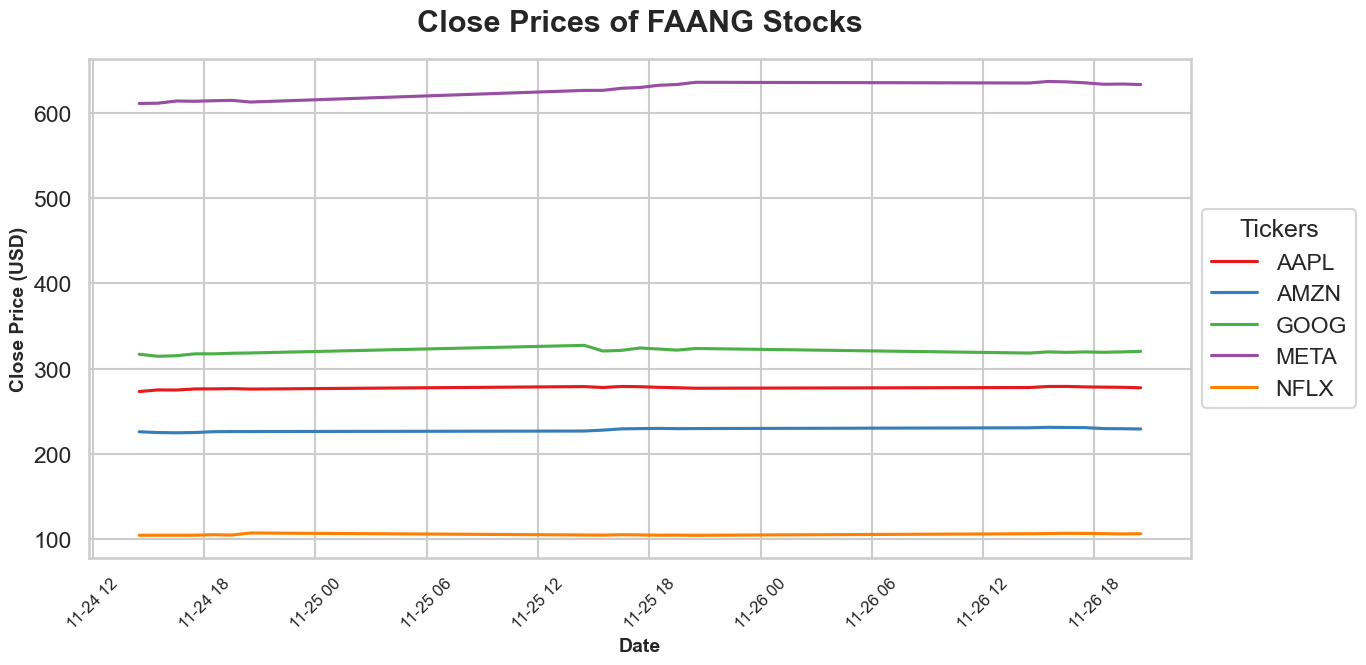

In [28]:
# Use a modern seaborn theme
sns.set_theme(style="whitegrid", context="talk", palette="Set1") #set seaborn theme and color palette

plt.figure(figsize=(14, 7)) # Set figure size

for ticker in df['Close'].columns:
    plt.plot(df['Close'][ticker], label=ticker) # Plot each stock's close price

plt.xticks(rotation=45, fontsize=12) # Rotate x-axis labels for better readability

# Labels and title
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Close Price (USD)', fontsize=14, fontweight='bold')
plt.title('Close Prices of FAANG Stocks', fontsize=22, pad=20, fontweight='bold')

# Legend outside plot
plt.legend(title="Tickers", loc="center left", bbox_to_anchor=(1, 0.5), frameon=True)

# Improve layout so the legend doesn't get cut off
plt.tight_layout()

#save plot to plots folder
now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
plt.savefig("plots/" + now + ".png")
plt.show()


The output plot displays the Close prices of the five FAANG stocks over the specified date range. Each stock is represented by a distinct line, and the x-axis shows the dates while the y-axis represents the Close prices in USD. The generated plots are saved in the plots folder in the root of my repository with filenames in the format YYYYMMDD-HHmmss.png.

## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

The standalone script `faang.py` contains the two functions `get_data()` and `plot_data()`, along with the necessary imports. The script is designed to be executed directly from the terminal, which makes the project more reusable. When run, the script first calls the `get_data()` function to download the latest stock data for the FAANG companies and save it to a CSV file in the data folder. Then, it calls the `plot_data()` function to read the latest data file, generate a plot of the Close prices for each stock, and save the plot as a PNG file in the plots folder.

To enable direct execution from the terminal, a [Shebang line](https://realpython.com/python-shebang/) is added at the top of the script, specifying the path to the Python interpreter.


```python
#!/usr/bin/env python3
```

Additionally, the script file is marked as executable using the `chmod` command in the terminal. This setup allows users to run the script simply by typing `./faang.py` in the terminal, streamlining the process of data retrieval and visualization.

To mark the script [executable](http://realpython.com/run-python-scripts/), I used the following command in the terminal:
```bash
chmod u+x faang.py
```

## Problem 4: Automation

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

A GitHub workflow is an automated process that runs one or more jobs in response to events in a repository. The workflow file is written in YAML syntax and consists of the following key components:
- `name`: This specifies the name of the workflow. In this case, it's "FAANG Data Fetch and Plot".
- `on`: This section defines the events that trigger the workflow. Here, the workflow is set to run on a schedule using cron syntax. The expression `0 9 * * 6` means the workflow will
run at 9:00 AM (UTC) every Saturday. By including `workflow_dispatch` in the `on` section of the workflow file, users can manually trigger the workflow from the GitHub Actions tab in their repository.
- `jobs`: This section contains the jobs that will be executed as part of the workflow.
  - `run-faang-script`: This is the identifier for the job.
    - `runs-on`: This specifies the type of virtual machine to run the job on. Here, it's set to `ubuntu-latest`, which means the job will run on the latest version of Ubuntu.
    - `steps`: This section lists the individual steps that make up the job.
      - `name: Checkout repository`: This step uses the `actions/checkout@v4` action to check out the repository's code into the current GitHub workspace so that it can be accessed by subsequent steps.
      - `name: Set up Python`: This step uses the `actions/setup-python@v5` action to set up a specific version of Python (3.10 in this case) on the runner.
      - `name: Install dependencies`: This step runs a command to install any necessary dependencies using pip. Here, it installs the `yfinance` package and any other dependencies specified in the requirements.txt file.
      - `name: Run FAANG script`: This step runs the `faang.py` script using Python.
        - `name: Commit and push results`: This step uses the `stefanzweifel/git-auto-commit-action@v7` action to automatically commit and push any changes made to the data and plots folders back to the repository. The `commit_message` parameter specifies the message to use for the commit, and the `file_pattern` parameter specifies which files to include in the commit (in this case, all CSV files in the data folder and all PNG files in the plots folder).

Each run provides detailed logs and status information for each step in the workflow, allowing users to monitor the execution and troubleshoot any issues that may arise.
The data and plots generated by the script will be saved in the respective `data` and `plots` folders in the root of the repository. These files can be accessed directly from the repository or downloaded for further analysis.

 It’s common practice and highly encouraged to use existing GitHub Actions in ones workflow files. This practice saves time and effort by leveraging pre-built functionalities. Available actions can be found in the [GitHub Marketplace](https://github.com/marketplace). GitHub has official actions for common tasks, such as [Checkout repository action](https://github.com/marketplace/actions/checkout) and [Set Up Python action](https://github.com/marketplace/actions/setup-python). Many community-contributed actions are available as well.

For more information on GitHub Actions, please visit the documentation [link](https://docs.github.com/en/actions).
Quick start with GitHub Actions [link](https://docs.github.com/en/actions/quickstart).
YouTube tutorial on GitHub Workflow and GitHub Actions [link](https://www.youtube.com/watch?v=Xwpi0ITkL3U).
Another Youtube tutorial on GitHub Actions [link](https://realpython.com/github-actions-python/).
Real Python tutorial on GitHub Actions [link](https://realpython.com/github-actions-python/).




YAML workflow files are stored and defined in a .github/workflows/ folder in project’s root directory. The following is the content of the `faang.yml` file:
```yaml
name: FAANG Data Fetch and Plot
on:
  schedule:
    - cron: '0 9 * * 6'  # Runs every Saturday at 9:00 AM UTC
  workflow_dispatch:      # can be run manually as well
jobs:
  run-faang-script:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout repository
        uses: actions/checkout@v4 # latest version of checkout action

      - name: Set up Python
        uses: actions/setup-python@v5 # latest version of setup-python action
        with:
          python-version: '3.10' # specify python version

      - name: Install dependencies
        run: pip install -r requirements.txt # pip install ensures all packages from requirements.txt file are installed (including yfinance)

      - name: Run FAANG script
        run: python faang.py

      -  name: Commit and push results
         uses: stefanzweifel/git-auto-commit-action@v7
         with:
          commit_message: "Update FAANG data and plots [automated]"
          file_pattern: 'data/*.csv plots/*.png'

```



## End